<a href="https://colab.research.google.com/github/vadimkholodilo/salary-predictor/blob/master/salary_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the project

It is a simple linear regression model which predicts a salary based on years of experience

## Data

The following dataset from Kaggle was used: https://www.kaggle.com/datasets/rsadiq/salary

## Installing required libraries

In [1]:
  # I use opendatasets library instead of the official Kaggle api, because opendatasets can also download from Google drive. If the dataset which is used in this project is removed from Kaggle, I will just upload it to Google Drive and the project will work as expected
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=d44a703158222d9e2b1c5d86d77c518b5626f6a7afd7101eae6392575575d4b0
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


## Authenticating with Caggle API

Upload your kaggle.json to the files section of Google Colab.
Kaggle.json contains sensitive information, so it is unique for your account.
DO NOT share it with anyone.

If you don't want to upload your kaggle.json, you can simply provide your username and key when prompted

In [3]:
# Make sure that kaggle.json is present
!ls

sample_data


## Downloading data

In [4]:
data_url = "https://www.kaggle.com/datasets/rsadiq/salary"
od.download(data_url)


100%|██████████| 392/392 [00:00<00:00, 663kB/s]

## Reading data

In [5]:
df = pd.read_csv("./salary/Salary.csv")

## Exploring data

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


## Cleaning data

Since our data is in the format we need, and there are no null values, we don't have to perform any data cleaning

## Creating traning and testing sets

In [8]:
x = df["YearsExperience"].to_numpy().reshape(-1, 1)
y = df["Salary"].to_numpy().reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 20% is used for testing the model


## Traning the model

In [9]:
regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

## Exploring results

Score: 0.971606571582704


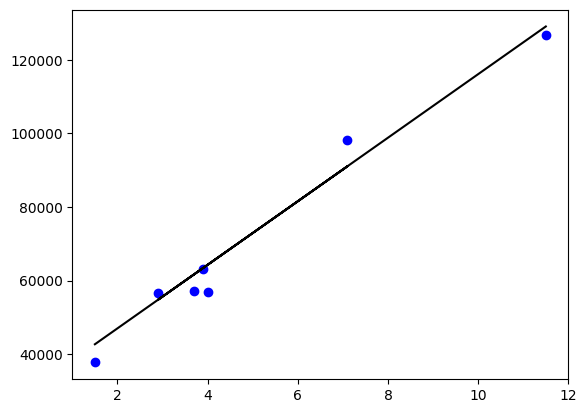

In [12]:
score = regression.score(x_test, y_test)
print(f"Score: {score}")
y_pred = regression.predict(x_test)
plt.scatter(x_test, y_test, color ="b")
plt.plot(x_test, y_pred, color="k")
plt.show()

The high accuracy score of our model suggests that our regression model has fit very well